In [1]:
import interactome as I
ixome = I.Interactome(I.PATH + I.INTERACTOME_FILE)

In [18]:
schiz_genes = []
with open("./disease-genes/schizo-fixed.txt") as f:
    for line in f:
        schiz_genes.append(int(line.strip()))

In [19]:
cnt = 0
schiz_genes_in_ixome = []
for gene in schiz_genes:
    if not ixome.G.has_node(gene):
        cnt += 1
        print(f"gene {gene} not in ixome")
    else:
        schiz_genes_in_ixome.append(gene)

gene 27184 not in ixome


In [20]:
schiz_graph = ixome.G.subgraph(schiz_genes_in_ixome)

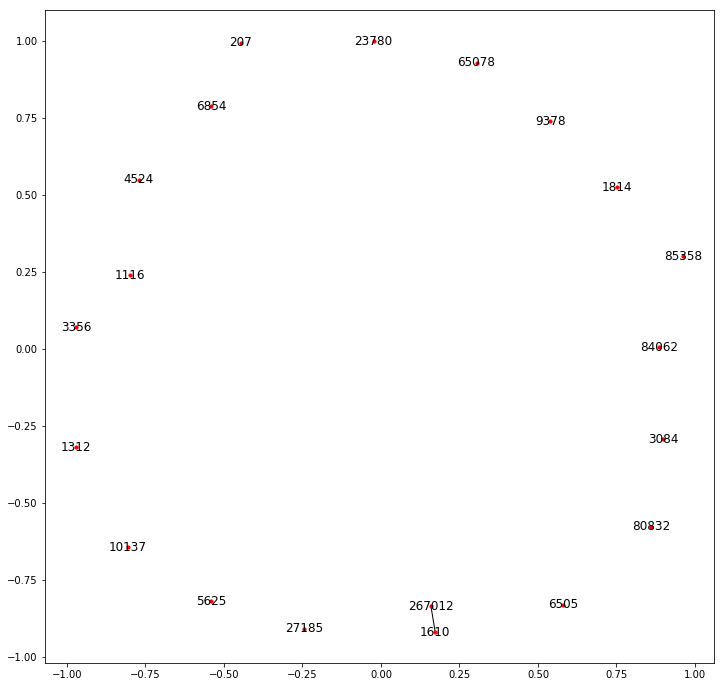

In [41]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(12, 12))
nx.draw_networkx(schiz_graph, node_size=10)

In [21]:
def get_disease_genes(disease):
    disease_genes = []
    disease_genes_in_ixome = []
    disease_genes_excluded = []
    with open(f"./disease-genes/{disease}.txt") as f:
        for line in f:
            gene = int(line.strip())
            disease_genes.append(gene)
            if not ixome.G.has_node(gene):
                disease_genes_excluded.append(gene)
                print(f"gene {gene} not in ixome")
            else:
                disease_genes_in_ixome.append(gene)
    
    return disease_genes, disease_genes_in_ixome, disease_genes_excluded

In [25]:
bipolar_genes, bipolar_ixome, bipolar_not_ixome = get_disease_genes("bipolar-fixed")

In [26]:
len(bipolar_ixome), len(bipolar_genes)

(1, 1)

In [27]:
def get_disease_subgraph(disease_genes, ixome):
    return ixome.G.subgraph(disease_genes)

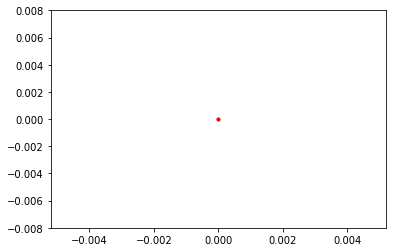

In [28]:
bipolar_module = get_disease_subgraph(bipolar_ixome, ixome)
nx.draw_networkx(bipolar_module, with_labels=False, node_size=10)

In [29]:
def max_connected_component(module):
    return max(map(len, nx.connected_components(module)))
max_connected_component(bipolar_module)

1

In [30]:
max_connected_component(schiz_graph)

2

In [14]:
bipolar_module.edges()

EdgeView([(6531, 6531), (5116, 27185), (6925, 1499), (6925, 6925), (6925, 1778), (7054, 121278), (142, 7157), (142, 142), (5649, 5649), (5649, 1600), (9722, 4842), (3612, 3612), (3612, 3613), (3613, 3613), (23327, 2908), (23327, 23327), (1312, 4128), (3360, 3360), (3360, 7750), (4128, 4128), (9248, 9248), (9131, 9131), (27185, 1778), (27185, 27185), (51764, 59345), (51764, 2784), (4535, 4535), (573, 2908), (573, 7157), (1861, 1778), (7494, 7494), (1605, 1605), (59345, 2784), (4308, 4308), (1499, 2932), (2908, 7157), (2908, 6908), (2908, 2932), (2908, 2908), (9575, 2932), (6506, 6506), (627, 627), (2932, 2932), (2932, 1786), (2932, 7157), (7157, 6908), (7157, 7157), (3832, 3832), (1786, 1786), (6908, 6908)])

In [15]:
schiz_graph.edges()

EdgeView([(10243, 10243), (2566, 2566), (2566, 1816), (3084, 2066), (3084, 1950), (2571, 2571), (5649, 5649), (2066, 2066), (2066, 10718), (2066, 2902), (5142, 5142), (5142, 27185), (8224, 6854), (8224, 9722), (9248, 9248), (4129, 4129), (4129, 1312), (27185, 27185), (27185, 81565), (27185, 7531), (27185, 9638), (6714, 85358), (6714, 7531), (6714, 1139), (6714, 80831), (6714, 207), (6714, 6714), (1610, 267012), (1621, 1621), (7257, 7257), (1116, 1116), (84062, 84062), (6257, 6257), (6257, 5915), (6258, 5915), (6258, 816), (627, 627), (1139, 351), (81565, 7531), (81565, 23236), (81565, 81565), (6310, 207), (6310, 7531), (6310, 6310), (3757, 3757), (3757, 7531), (23236, 5999), (6854, 6854), (6854, 9722), (6854, 7531), (207, 207), (54487, 54487), (8929, 8929), (4842, 9722), (1270, 348), (1270, 1270), (4855, 4855), (1786, 1786), (6908, 6595), (6908, 7531), (6908, 6908), (1812, 2902), (1813, 6531), (1813, 4905), (5915, 5915), (796, 796), (3358, 3358), (3360, 3360), (4905, 351), (4905, 4905)

In [33]:
autism_genes, autism_ixome, autism_not_ixome = get_disease_genes("autism-fixed")

gene 139411 not in ixome


In [34]:
autism_genes

[139411, 6134, 22941, 57502, 54413, 6638, 4204]

In [35]:
autism_module = get_disease_subgraph(autism_ixome, ixome)

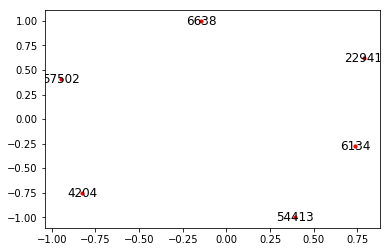

In [37]:
nx.draw_networkx(autism_module, with_labels=True, node_size=10)

In [42]:
import mygene
gene_lookup = mygene.MyGeneInfo()

In [43]:
gene_lookup.getgene("LOC105377563")